-**Author: Mindy Wang**

-**Title: Using Adverse event text to predict if patitent is injured due to the device malfunction.**

-**Data Set: MAUDE - Manufacturer and User Facility Device Experience**
   from Open FDA

[MADUE] https://www.accessdata.fda.gov/scripts/cdrh/cfdocs/cfmaude/results.cfm

500 records of adverse events reported from 01/01/2020 to 05/31/2023

>I intend to do a NLP study on Adverse Events reported on medical device.  I will use Multinomial Naive Bayes classifier to do the analysis.  There is a variable called event text.  I would like to use it to predict whether the patient is injured or not.  I hope to be able to contribute to discovery of the causes of injury due to medical device malfunction.
I will do data cleaning first.  I will change the text to lower case, since it is all upper case now. Tokenize the data.  I will remove stop words, and adding “Event Description:” to the stop words dictionary.  I might also do a topic
modeling to find out if there are some common topics in these event descriptions.  Then, I will use Multinomial Naive Bayes classifier to do the analysis.  





In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/maudeExcelReport24.csv')
df.head(2)

,Unnamed: 0,Web Address,Report Number,Event Date,Event Type,Manufacturer,Date Received,Product Code,Brand Name,Device Problem,Patient Problem,PMA/PMN Number,Exemption Number,Number of Events,Event Text
0,NaN,https://www.accessdata.fda.gov/scripts/cdrh/cf...,2032227-2023-199676,2023/04/06 4:00:00,Malfunction,MEDTRONIC PUERTO RICO OPERATIONS CO.,2023/04/30 4:00:00,OZO,630G INSULIN PUMP MMT-1715KL 630G,Unexpected Therapeutic Results; Obstruction o...,"No Clinical Signs, Symptoms or Conditions",P150001,NaN,1.0,Event Description: INFORMATION RECEIVED BY MED...
1,NaN,https://www.accessdata.fda.gov/scripts/cdrh/cf...,3012307300-2023-04777,2021/07/12 4:00:00,Malfunction,"SMITHS MEDICAL INTERNATIONAL, LTD.",2023/04/30 4:00:00,BTO,PVC - PORTEX TUBES BLUE LINE ULTRA (BLU),Leak/Splash,"No Clinical Signs, Symptoms or Conditions",K173384,NaN,1.0,Event Description: IT WAS REPORTED THAT THE DE...


In [2]:
#looking at all the columns in my data frame
df.columns

Index(['Unnamed: 0', 'Web Address', 'Report Number', 'Event Date',
       'Event Type', 'Manufacturer', 'Date Received', 'Product Code',
       ' Brand Name', ' Device Problem', 'Patient Problem', 'PMA/PMN Number',
       'Exemption Number', 'Number of Events', 'Event Text'],
      dtype='object')

In [3]:
df['Event Type'].value_counts()

Malfunction                                                                            298
Injury                                                                                 202
 serious injuries and malfunctions. The FDA uses MDRs to monitor device performance      1
 untimely                                                                                1
 importer                                                                                1
 if the manufacturer is not known.                                                       1
Name: Event Type, dtype: int64

In [4]:
#add a new derived variable 'Injury'
#if the malfuction cause injury, the injury will be one, else injury will be 0

df['Injury']=[1 if i =='Injury' else 1 if i ==' serious injuries and malfunctions. The FDA uses MDRs to monitor device performance'  else 0 for i in df['Event Type']]


In [ ]:
# recode the 'Event Type' to create a derived variable 'Injury as my target variable
# looking the value distribution of my target variable.
df['Injury'].value_counts()

0    304
1    203
Name: Injury, dtype: int64

In [ ]:
#widen the diplay width
pd.set_option('display.max_colwidth', None)

In [ ]:
df['Event Text'].head()

0    Event Description: INFORMATION RECEIVED BY MEDTRONIC INDICATED THAT THE CUSTOMER REPORTED A INSULIN PUMP SUSPENDS ON ITS OWN, UNEXPLAINED INSULIN FLOW BLOCKED ALARMS AND REJECTS BRAND NEW BATTERIES. THE CUSTOMER WAS DECLINED TROUBLESHOOTING. NO HARM REQUIRING MEDICAL INTERVENTION WAS REPORTED. IT WAS UNKNOWN WHETHER THE CUSTOMER DISCONTINUED THE USE OF THE INSULIN PUMP AND THE INSULIN PUMP WILL NOT BE RETURNED FOR ANALYSIS. Manufacturer Narrative: (B)(4). CURRENTLY IT IS UNKNOWN WHETHER OR NOT THE DEVICE MAY HAVE CAUSED OR CONTRIBUTED TO THE EVENT AS NO PRODUCT HAS BEEN RETURNED. NO CONCLUSION CAN BE DRAWN AT THIS TIME. WE THEREFORE CONSIDER THIS REPORT COMPLETE TO THE BEST OF OUR KNOWLEDGE. MEDTRONIC, INC. (MEDTRONIC) IS SUBMITTING THIS REPORT TO COMPLY WITH 21 C.F.R. PART 803, THE MEDICAL DEVICE REPORTING REGULATION. THIS REPORT IS BASED UPON INFORMATION OBTAINED BY MEDTRONIC, WHICH THE COMPANY MAY NOT HAVE BEEN ABLE TO FULLY INVESTIGATE OR VERIFY PRIOR TO THE DATE THE REPORT WA

***Looking at Products that report the highest adverse events***


In [ ]:
df['Product Code'].value_counts()

DZE                                                                                                                                                                                100
FRN                                                                                                                                                                                 69
OZP                                                                                                                                                                                 45
LGW                                                                                                                                                                                 38
BTL                                                                                                                                                                                 16
                                                                                     

In [ ]:
# Get the value counts for the 'Product Code'column
product_counts = df['Product Code'].value_counts()


In [ ]:
# Select the top ten values
top_ten_products = product_counts.head(10)


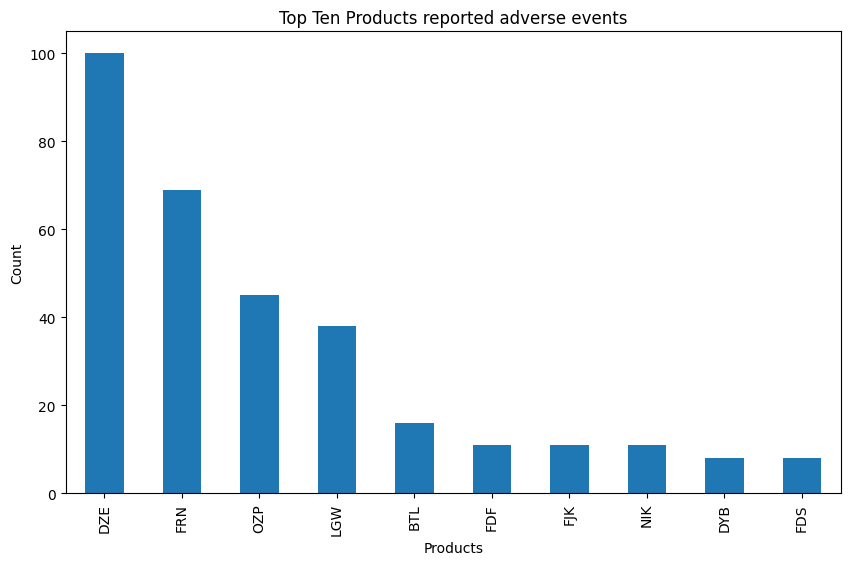

In [ ]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
top_ten_products.plot(kind='bar')
plt.title('Top Ten Products reported adverse events')
plt.xlabel('Products')
plt.ylabel('Count')
plt.show()

The most common products to report adverse event are DZE, followed by FRN and OZP.
OZE is a dental implant, Endosseous, Root-Form.
FRN is a Pump, Infusion.
OZP is an Automated Insulin Dosing Device System, Single Hormonal Control.

***Looking at patient problem***

In [ ]:
df['Patient Problem'].value_counts()

 No Clinical Signs, Symptoms or Conditions                                     292
 Failure of Implant                                                             84
 Inadequate Pain Relief                                                         19
 Insufficient Information                                                       16
 Hyperglycemia                                                                  14
 Hemorrhage/Bleeding                                                             9
 Implant Pain                                                                    9
 Skin Inflammation/ Irritation                                                   5
 Unspecified Infection                                                           5
 Failure of Implant; Inadequate Pain Relief                                      4
 Failure of Implant; Pain                                                        4
 Foreign Body In Patient                                                         3
 Pai

In [ ]:
# Get the value counts for the 'Patient Problem' column
problem_counts = df['Patient Problem'].value_counts()


In [ ]:
# Select the top ten values
top_ten_problems = problem_counts.head(10)


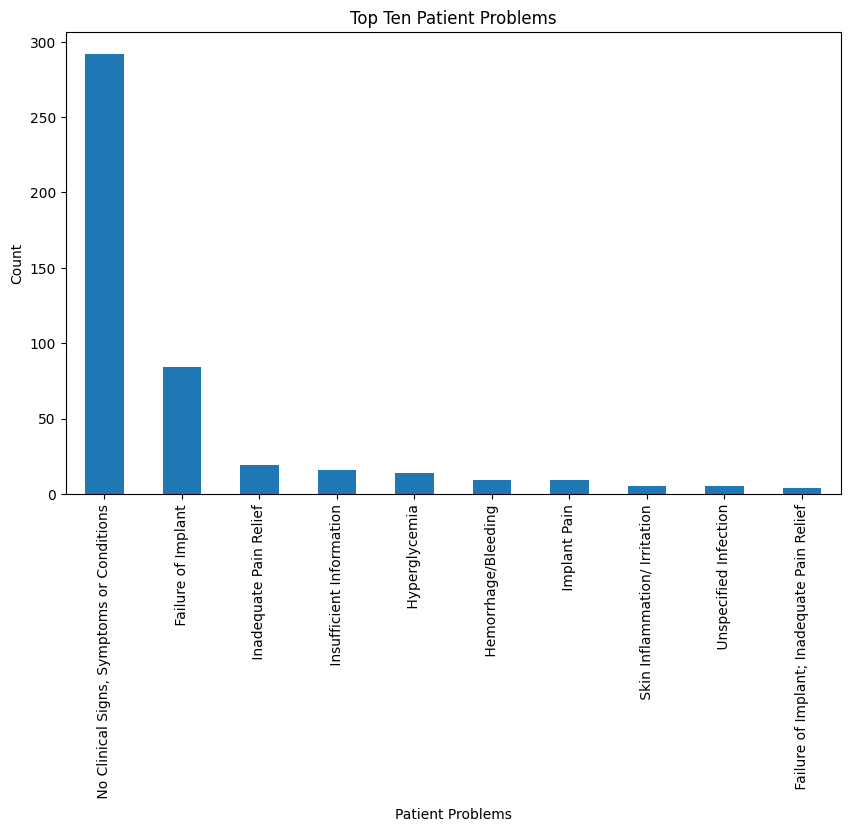

In [ ]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
top_ten_problems.plot(kind='bar')
plt.title('Top Ten Patient Problems')
plt.xlabel('Patient Problems')
plt.ylabel('Count')
plt.show()


It look like in the majority of the cases, there is no symptoms of condition.  some other most common conditions are pain, inmplant problems, bleeding, or high blood sugar.

In [ ]:
df['Number of Events'].value_counts()

1.0      499
265.0      1
Name: Number of Events, dtype: int64

Since there is one record that has 265 number of events, which make me to want to exam further what happened.

According to the text description:
THIS REPORT SUMMARIZES 265 MALFUNCTION EVENTS. THE EVENT WAS RELATED TO SUCTION LOSS DURING LASER FIRE. THERE WERE NO Event Description: THIS REPORT SUMMARIZES 265 MALFUNCTION EVENTS. THE EVENT WAS RELATED TO SUCTION LOSS DURING LASER FIRE. THERE WERE NO PATIENT INJURIES REPORTED ASSOCIATED TO THE EVENTS. Manufacturer Narrative: ADDITIONAL INFORMATION: 60394054 (X20), 60381646 (X16), 60347300 (X14), 60415092 (X14), 60428228 (X12), UNK (X12), 60394053 (X12), 60417230 (X11), 60426324 (X9), 60406576 (X9), 60425407 (X9), 60377740 (X9), 60417232 (X8), 60347544 (X8), 60425406 (X7), 60383020 (X6), 60375374 (X6), 60410166 (X6), 60358902 (X5), 60401427 (X5), 60398493 (X4), 60343189 (X4), 60426325 (X4), 60405221 (X4), 60403113 (X4), 60410167 (X3), 60396479 (X3), 60403114 (X3), 60399698 (X3), 60357170 (X2), 60429450 (X2), 60388200 (X2), 60377741 (X2), 60324362 (X2), 60348567 (X2), 60388199 (X2), 60435019 (X2), 60401425 (X1), 60335986 (X1), 60309863 (X1), 60385030 (X1), 60338314 (X1), 60341112 (X1), 60343420 (X1), 60324359 (X1), 60423183 (X1), 60368822 (X1), 60397718 (X1), 60371597 (X1), 60355767 (X1), 60390024 (X1), 60383021 (X1), 60390924 (X1), 60389250 (X1), 60290828 (X1), 60389491 (X1). ONE HUNDRED AND THIRTY (130) INVESTIGATIONS WERE COMPLETED. AND 135 ARE STILL IN PROGRESS DURING THE PERIOD. FOR 2 INVESTIGATIONS, THE DEVICES WERE RETURNED INCOMPLETE. AND FOR OTHER 2, THE DEVICES DID NOT ACHIEVE SUCTION, AN FOR THE REST THERE WAS NO PRODUCT DEFICIENCY WAS IDENTIFIED. A REVIEW OF THE RECORDS RELATED TO THE DEVICE THAT INCLUDED LABELING, MANUALS, TRENDING, AND RISK DOCUMENTATION WAS PERFORMED. A REVIEW OF THE DEVICE HISTORY RECORD (DHR) SHOWED THAT THE SYSTEM AND ITS COMPONENTS MET ALL SPECIFICATIONS PRIOR TO BEING RELEASED. NO PRODUCT DEFICIENCY WAS IDENTIFIED. ALL PERTINENT INFORMATION AVAILABLE TO JOHNSON & JOHNSON SURGICAL VISION, INC. HAS BEEN SUBMITTED.

Since this is a summary and no partient was injured.  I am ready to proceed.

In [ ]:
#looking ath null values
df.isnull().sum()

Unnamed: 0          500
Web Address           0
Report Number         0
Event Date           56
Event Type            3
Manufacturer          4
Date Received         4
Product Code          4
 Brand Name           5
 Device Problem       7
Patient Problem       7
PMA/PMN Number       96
Exemption Number    507
Number of Events      7
Event Text            7
dtype: int64

In [ ]:
#looking at the one record that has extremely high number of event
df[df['Number of Events']==265.0]

,Unnamed: 0,Web Address,Report Number,Event Date,Event Type,Manufacturer,Date Received,Product Code,Brand Name,Device Problem,Patient Problem,PMA/PMN Number,Exemption Number,Number of Events,Event Text
311,NaN,https://www.accessdata.fda.gov/scripts/cdrh/cfdocs/cfMAUDE/Detail.CFM?MDRFOI__ID=16841096&pc=HNO,3012236936-2023-01079,NaN,Malfunction,"JOHNSON & JOHNSON SURGICAL VISION, INC.",2023/04/29 4:00:00,HNO,FS DISPOSABLE INTERFACE,Decrease in Suction,"No Clinical Signs, Symptoms or Conditions",K060372,NaN,265.0,"Event Description: THIS REPORT SUMMARIZES 265 MALFUNCTION EVENTS. THE EVENT WAS RELATED TO SUCTION LOSS DURING LASER FIRE. THERE WERE NO PATIENT INJURIES REPORTED ASSOCIATED TO THE EVENTS. Manufacturer Narrative: ADDITIONAL INFORMATION: 60394054 (X20), 60381646 (X16), 60347300 (X14), 60415092 (X14), 60428228 (X12), UNK (X12), 60394053 (X12), 60417230 (X11), 60426324 (X9), 60406576 (X9), 60425407 (X9), 60377740 (X9), 60417232 (X8), 60347544 (X8), 60425406 (X7), 60383020 (X6), 60375374 (X6), 60410166 (X6), 60358902 (X5), 60401427 (X5), 60398493 (X4), 60343189 (X4), 60426325 (X4), 60405221 (X4), 60403113 (X4), 60410167 (X3), 60396479 (X3), 60403114 (X3), 60399698 (X3), 60357170 (X2), 60429450 (X2), 60388200 (X2), 60377741 (X2), 60324362 (X2), 60348567 (X2), 60388199 (X2), 60435019 (X2), 60401425 (X1), 60335986 (X1), 60309863 (X1), 60385030 (X1), 60338314 (X1), 60341112 (X1), 60343420 (X1), 60324359 (X1), 60423183 (X1), 60368822 (X1), 60397718 (X1), 60371597 (X1), 60355767 (X1), 60390024 (X1), 60383021 (X1), 60390924 (X1), 60389250 (X1), 60290828 (X1), 60389491 (X1). ONE HUNDRED AND THIRTY (130) INVESTIGATIONS WERE COMPLETED. AND 135 ARE STILL IN PROGRESS DURING THE PERIOD. FOR 2 INVESTIGATIONS, THE DEVICES WERE RETURNED INCOMPLETE. AND FOR OTHER 2, THE DEVICES DID NOT ACHIEVE SUCTION, AN FOR THE REST THERE WAS NO PRODUCT DEFICIENCY WAS IDENTIFIED. A REVIEW OF THE RECORDS RELATED TO THE DEVICE THAT INCLUDED LABELING, MANUALS, TRENDING, AND RISK DOCUMENTATION WAS PERFORMED. A REVIEW OF THE DEVICE HISTORY RECORD (DHR) SHOWED THAT THE SYSTEM AND ITS COMPONENTS MET ALL SPECIFICATIONS PRIOR TO BEING RELEASED. NO PRODUCT DEFICIENCY WAS IDENTIFIED. ALL PERTINENT INFORMATION AVAILABLE TO JOHNSON & JOHNSON SURGICAL VISION, INC. HAS BEEN SUBMITTED."


***Looking at Manufacturers***

In [ ]:
# Get the value counts for the 'Manufacturer'column
df['Manufacturer'].value_counts()


NOBEL BIOCARE AB                                         76
CAREFUSION SD                                            66
MEDTRONIC PUERTO RICO OPERATIONS CO.                     44
ST. JUDE MEDICAL, INC.(CRM-SYLMAR)                       32
ST. JUDE MEDICAL - NEUROMODULATION (PUERTO RICO, LLC)    27
                                                         ..
COCHLEAR LTD                                              1
IMMUCOR, INC.                                             1
B. BRAUN MEDICAL INC.                                     1
SMITH & NEPHEW ORTHOPAEDICS AG                            1
 distributor                                              1
Name: Manufacturer, Length: 75, dtype: int64

In [ ]:
# Get the value counts for the 'Manufacturer' column
Manufacturer_counts = df['Manufacturer'].value_counts()


In [ ]:
# Select the top ten values
top_ten_Manufacturer = Manufacturer_counts.head(10)


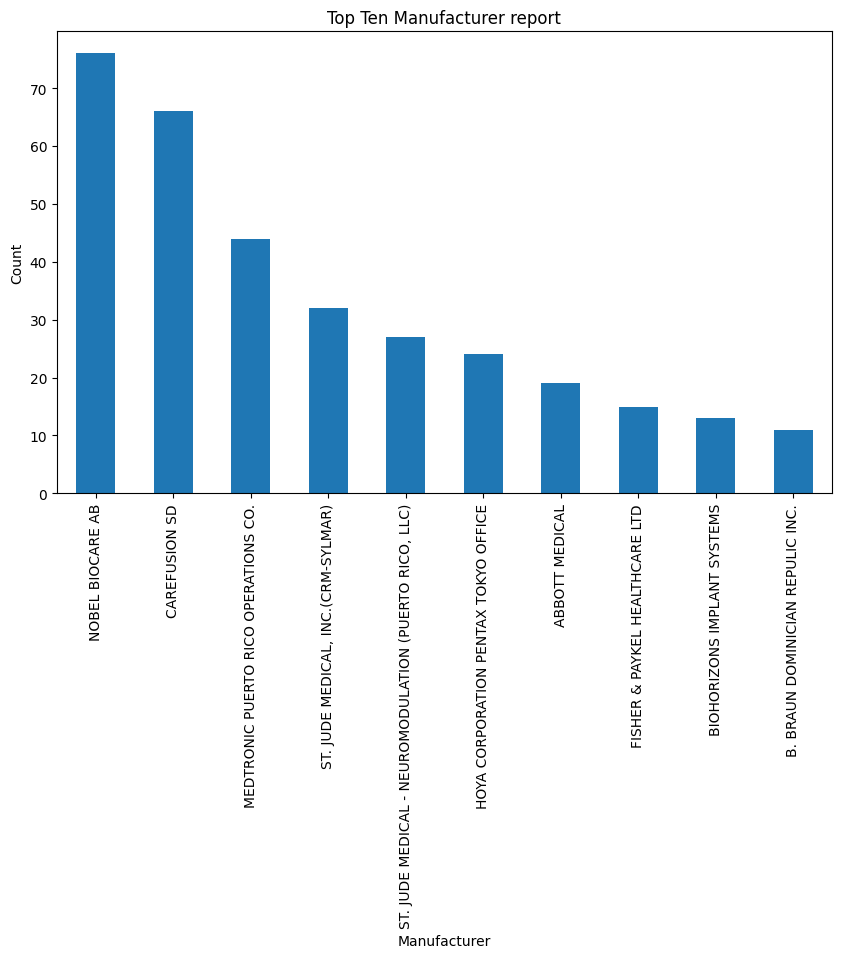

In [ ]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
top_ten_Manufacturer.plot(kind='bar')
plt.title('Top Ten Manufacturer report')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show()


During the period between Jan 1, 2020 and May 31, 2023, Nobel Biocare AB reports the most adverse events, followed by Carefusion sd, and Medtronic Puerto Rico Operations Co.

***Looking at Device Problem***

In [ ]:
df[' Device Problem'].value_counts()

 Failure to Osseointegrate                                 85
 Break                                                     40
 Adverse Event Without Identified Device or Use Problem    23
 Corroded                                                  17
 Pressure Problem                                          15
                                                           ..
 Failure to Calibrate                                       1
 Malposition of Device                                      1
 Difficult to Remove                                        1
 Activation Failure                                         1
 Inability to Irrigate; No Pressure                         1
Name:  Device Problem, Length: 155, dtype: int64

In [ ]:
# Get the value counts for the ' Device Problem' column
device_counts = df[' Device Problem'].value_counts()


In [ ]:
# Select the top ten values
top_ten_problems = device_counts.head(10)


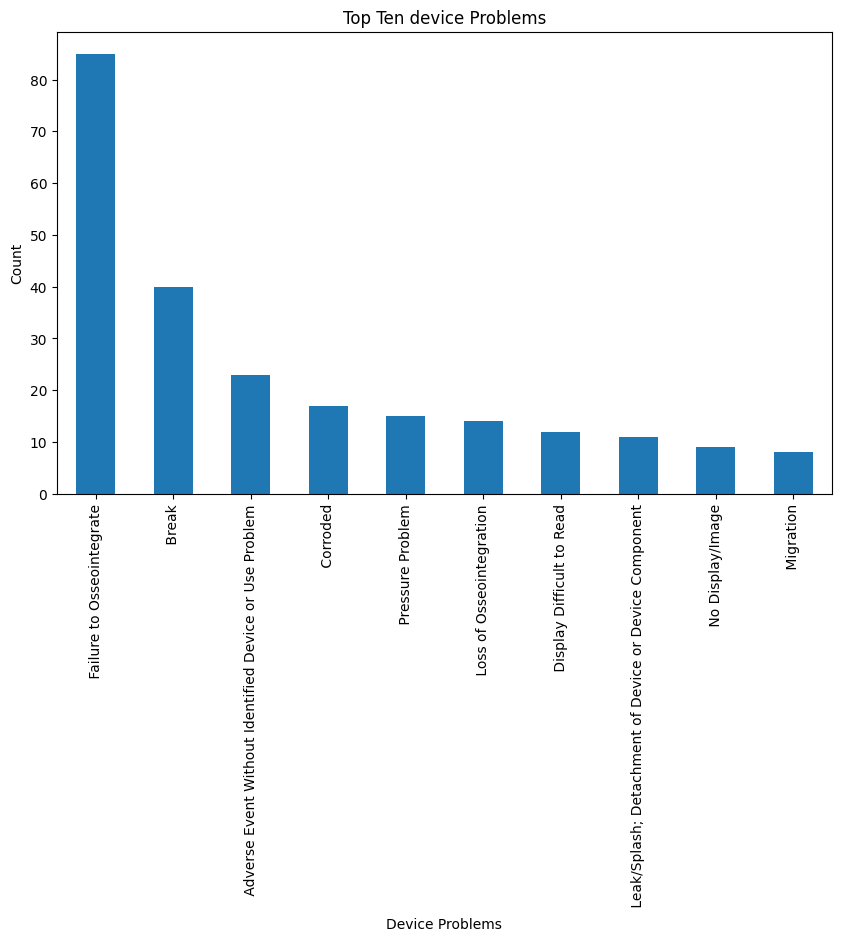

In [ ]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
top_ten_problems.plot(kind='bar')
plt.title('Top Ten device Problems')
plt.xlabel('Device Problems')
plt.ylabel('Count')
plt.show()


During the period between Jan 1, 2020 and May 31, 2023, most common malfuction of device is faillure to osseointegrate, followed by break, and without identified device problem.

In [5]:
# Selecting the desired columns
df = df[['Injury', 'Event Text']]

# Displaying the new DataFrame
df.head()


,Injury,Event Text
0,0,Event Description: INFORMATION RECEIVED BY MED...
1,0,Event Description: IT WAS REPORTED THAT THE DE...
2,0,Event Description: IT WAS REPORTED THAT A WHIT...
3,1,Event Description: THE PATIENT WAS UNDERGOING ...
4,0,Event Description: CUSTOMER REPORTED NURSE ACT...


In [7]:
#cheking for null value
df.isnull().sum()

Injury        0
Event Text    7
dtype: int64

In [8]:
#drop reocrd where event text has a null value
df.dropna(subset=['Event Text'], inplace=True)


In [9]:
#cheking for null value again
df.isnull().sum()

Injury        0
Event Text    0
dtype: int64

In [25]:
#import necessary library for text processing
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus.reader.wordnet import WordNetError
from nltk.corpus import wordnet
#from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# Clean the text ‘review’ and create a column called ‘review_processed’
df['text_processed'] = df['Event Text'].str.replace('[^a-zA-Z0-9\s]', '').str.lower()

# Replace short words
df['text_processed'] = df['text_processed'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

# Remove stopwords
stop_words = set(stopwords.words('english'))
custom_stop_words = ['event', 'description']
stop_words.update(custom_stop_words)
df['text_processed'] = df['text_processed'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))

# Lemmatize the text
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def wordnet_lemmatize(text):
    tagged = nltk.pos_tag(word_tokenize(text))
    wordnet_tagged = []
    for token, tag in tagged:
        wn_tag = get_wordnet_pos(tag)
        if wn_tag is None:
            wordnet_tagged.append(token)
        else:
            wordnet_tagged.append(lemmatizer.lemmatize(token, wn_tag))
    return ' '.join(wordnet_tagged)

df['text_processed'] = df['text_processed'].apply(wordnet_lemmatize)

<ipython-input-28-075a17328355>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_processed'] = df['Event Text'].str.replace('[^a-zA-Z0-9\s]', '').str.lower()


In [29]:
#take a look after processing the text
df.head()


,Injury,Event Text,text_processed
0,0,Event Description: INFORMATION RECEIVED BY MED...,information receive medtronic indicate custome...
1,0,Event Description: IT WAS REPORTED THAT THE DE...,report device tube balloon rupture replaced pa...
2,0,Event Description: IT WAS REPORTED THAT A WHIT...,report white look powder find balloon cuff tub...
3,1,Event Description: THE PATIENT WAS UNDERGOING ...,patient undergo thrombectomy procedure right s...
4,0,Event Description: CUSTOMER REPORTED NURSE ACT...,customer report nurse activated novaplus infan...


In [31]:
df_injury=df[df['Injury'] == 1]
df_injury.head()

,Injury,Event Text,text_processed
3,1,Event Description: THE PATIENT WAS UNDERGOING ...,patient undergo thrombectomy procedure right s...
7,1,Event Description: IT WAS REPORTED THAT THE PA...,report patient underwent revision procedure du...
8,1,Event Description: IT WAS REPORTED THAT THE PA...,report patient epidural infection patient unde...
15,1,Event Description: INFORMATION RECEIVED BY MED...,information receive medtronic indicated custom...
21,1,Event Description: INFORMATION RECEIVED BY MED...,information receive medtronic indicate custome...


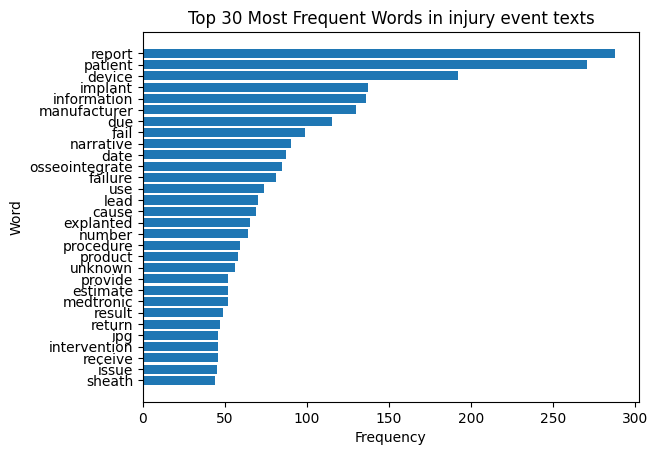

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# extract words from review_processed into list
words = []
for review in df_injury['text_processed']:
    words.extend(review.split())

# count frequency of each word
word_counts = Counter(words)

# create a DataFrame with word counts and sort by frequency
word_df = pd.DataFrame({'word': list(word_counts.keys()), 'count': list(word_counts.values())})
#sort the data in decending order
word_df = word_df.sort_values('count', ascending=False)

# subset top 30 words by frequency
top_words = word_df[:30]
top_words = top_words.sort_values('count', ascending=True)
# plot horizontal bar chart
plt.barh(top_words['word'], top_words['count'])
plt.title('Top 30 Most Frequent Words in injury event texts')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


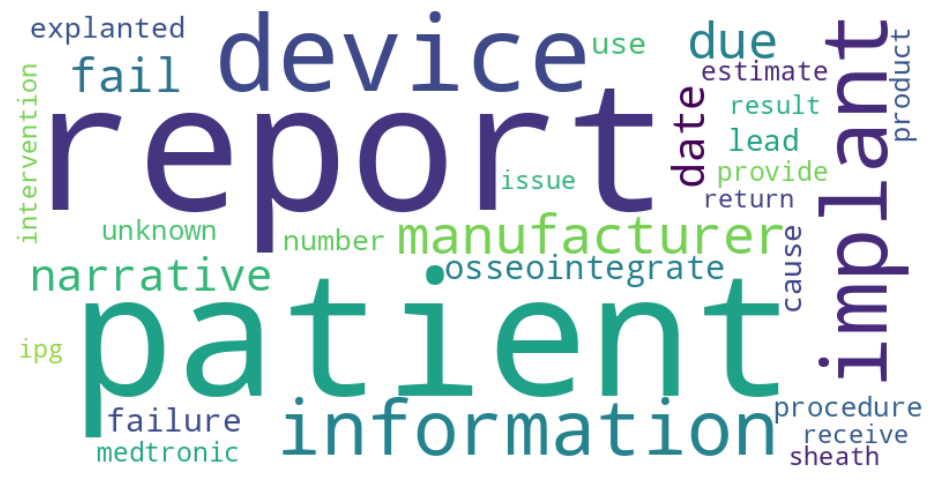

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# create a dictionary of word counts
word_counts = dict(zip(top_words['word'], top_words['count']))

# create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [35]:
from sklearn.model_selection import train_test_split

data=df.copy()
y=data['Injury'].values
data.drop(['Injury'], axis=1, inplace=True)

X_train, X_test, y_train, y_test =train_test_split(data, y, test_size=0.2, stratify=y)

print('Train data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)


Train data: (400, 2) (400,)
Test data: (100, 2) (100,)


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vect =CountVectorizer(min_df=10)

X_train_text_bow = vect.fit_transform(X_train['text_processed'])
X_test_text_bow = vect.fit_transform(X_test['text_processed'])

print('X_train_text_bow shape:', X_train_text_bow.shape)
print('X_test_text_bow shape:', X_test_text_bow.shape)

X_train_text_bow shape: (400, 377)
X_test_text_bow shape: (100, 149)


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data=df.copy()
y=data['Injury'].values
data.drop(['Injury'], axis=1, inplace=True)

# Initialize CountVectorizer with a vocabulary size of 2500
vectorizer = CountVectorizer(max_features=2500)

# Transform the texts into a sparse matrix
X = vectorizer.fit_transform(data['text_processed'])


# Split the data into training and testing sets (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

# Train a Gaussian Naive Bayes model on the training set
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)

# Evaluate the accuracy of the model on the test set
y_pred = gnb.predict(X_test.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Train data: (400, 2500) (400,)
Test data: (100, 2500) (100,)
Accuracy: 0.89


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = df.copy()
y = data['Injury'].values
data.drop(['Injury'], axis=1, inplace=True)

# Initialize CountVectorizer with a vocabulary size of 2500
vectorizer = CountVectorizer(max_features=2500)

# Transform the texts into a sparse matrix
X = vectorizer.fit_transform(data['text_processed'])

# Split the data into training and testing sets (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

# Train a Multinomial Naive Bayes model on the training set
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Evaluate the accuracy of the model on the test set
y_pred = mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Train data: (400, 2500) (400,)
Test data: (100, 2500) (100,)
Accuracy: 0.86


Confusion Matrix:
 [[48 11]
 [ 3 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87        59
           1       0.78      0.93      0.84        41

    accuracy                           0.86       100
   macro avg       0.86      0.87      0.86       100
weighted avg       0.87      0.86      0.86       100



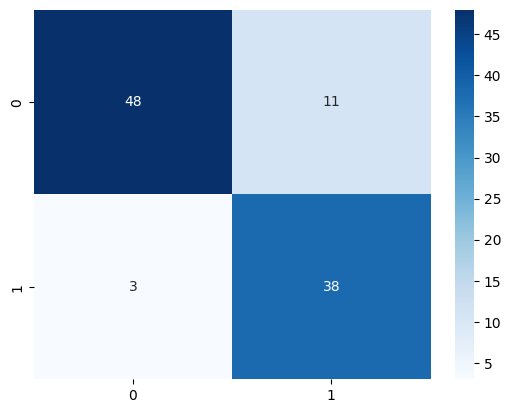

In [42]:
# Create the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

# Create a heatmap to show TP, FP, TN, FN values
sns.heatmap(cm, annot=True, cmap="Blues")
plt.show()


In [43]:
from sklearn.linear_model import LogisticRegression
c_values = [0.01, 0.05, 0.5, 0.5, 1]
for c in c_values:
    lr = LogisticRegression(C=c)
    lr.fit(X_train.toarray(), y_train)
    y_pred = lr.predict(X_test.toarray())
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for C={c}: {accuracy}")



Accuracy for C=0.01: 0.88
Accuracy for C=0.05: 0.94
Accuracy for C=0.5: 0.92
Accuracy for C=0.5: 0.92
Accuracy for C=1: 0.91


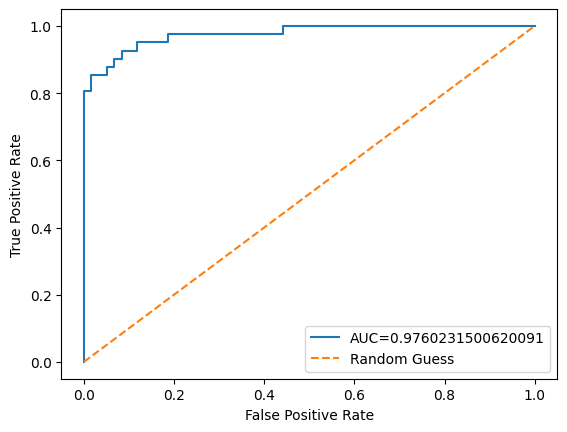

In [44]:
# Plot the ROC curve for the logistic regression model with C=0.5
lr = LogisticRegression(C=0.5)
lr.fit(X_train.toarray(), y_train)
y_pred_proba = lr.predict_proba(X_test.toarray())[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC={auc}")
plt.plot([0, 1], [0, 1], "--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
